<a href="https://colab.research.google.com/github/gauravry/DS_Portfolio/blob/main/Linear_Regression_Our_Own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import plotly.graph_objs as go
from sklearn import datasets

# Generate the dataset
X, y = datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=4)

# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=y,
    mode='markers',
    marker=dict(
        size=5,
        color=y,
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8,
    ),
)

# Define the layout
layout = go.Layout(
    title='Interactive 3D Scatter Plot of Regression Dataset',
    scene=dict(
        xaxis=dict(title='Feature 1'),
        yaxis=dict(title='Feature 2'),
        zaxis=dict(title='Target'),
    ),
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the figure
fig.show()


Mean Squared Error: 1199.55


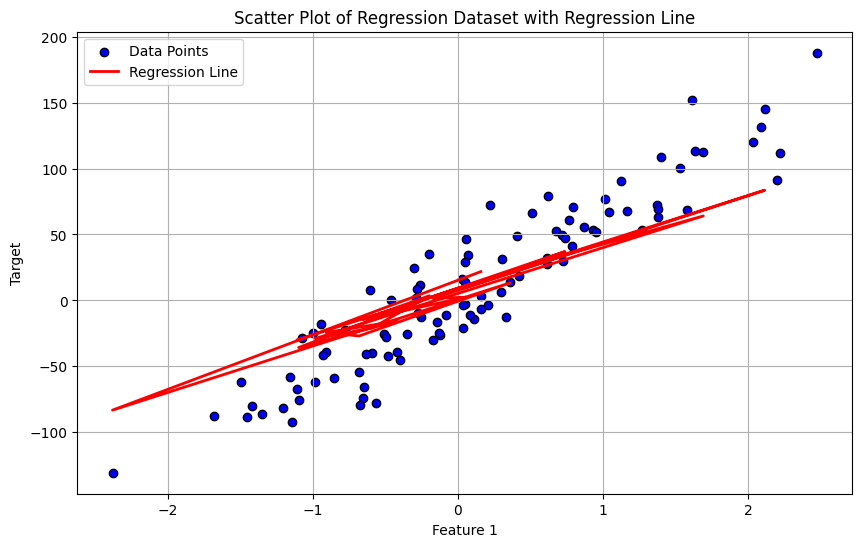

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class Our_OWN_LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr  # Learning rate
        self.n_iters = n_iters  # Number of iterations
        self.weights = None  # Weights will be initialized during fitting
        self.bias = None  # Bias will be initialized during fitting

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            # Linear model
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Generate the dataset
X, y = datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=4)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the model
model = Our_OWN_LinearRegression(lr=0.001, n_iters=1000)

# Train the model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f"Mean Squared Error: {mse:.2f}")

# Plot the regression dataset and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', edgecolor='k', label='Data Points')
plt.plot(X_test[:, 0], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Scatter Plot of Regression Dataset with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import numpy as np
import plotly.graph_objs as go
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class Our_OWN_LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr  # Learning rate
        self.n_iters = n_iters  # Number of iterations
        self.weights = None  # Weights will be initialized during fitting
        self.bias = None  # Bias will be initialized during fitting

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            # Linear model
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Generate the dataset
X, y = datasets.make_regression(n_samples=100, n_features=3, noise=20, random_state=4)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the model
model = Our_OWN_LinearRegression(lr=0.001, n_iters=1000)

# Train the model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f"Mean Squared Error: {mse:.2f}")

# Plot the regression dataset and the regression plane in 3D using Plotly
scatter_data = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(color='blue', size=5), name='Data Points')

# To visualize the regression plane, we need to create a grid
x0_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)
x2_grid = (model.weights[0] * x0_grid + model.weights[1] * x1_grid + model.bias) / -model.weights[2]
regression_plane = go.Surface(x=x0_grid, y=x1_grid, z=x2_grid, opacity=0.5, colorscale='Reds', showscale=False, name='Regression Plane')

# Create the layout
layout = go.Layout(title='3D Scatter Plot of Regression Dataset with Regression Plane',
                   scene=dict(xaxis=dict(title='Feature 1'),
                              yaxis=dict(title='Feature 2'),
                              zaxis=dict(title='Target')),
                   margin=dict(l=0, r=0, b=0, t=50))

# Create the figure
fig = go.Figure(data=[scatter_data, regression_plane], layout=layout)

# Show the figure
fig.show()


Mean Squared Error: 2353.78


In [17]:
import numpy as np
import plotly.graph_objs as go
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class Our_OWN_LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr  # Learning rate
        self.n_iters = n_iters  # Number of iterations
        self.weights = None  # Weights will be initialized during fitting
        self.bias = None  # Bias will be initialized during fitting

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            # Linear model
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Generate the dataset
X, y = datasets.make_regression(n_samples=100, n_features=3, noise=20, random_state=4)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the model
model = Our_OWN_LinearRegression(lr=0.001, n_iters=1000)

# Train the model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f"Mean Squared Error: {mse:.2f}")

# Create a meshgrid for plotting the regression plane
x0_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)
x2_grid = np.zeros_like(x0_grid)

# Populate the grid with predicted values using the trained model
for i in range(len(x0_range)):
    for j in range(len(x1_range)):
        x0 = x0_range[i]
        x1 = x1_range[j]
        x2_grid[j, i] = model.predict(np.array([[x0, x1, 0]]))  # Need to reshape for prediction

# Plot the regression plane along with the data points
fig = go.Figure()

# Scatter plot of data points
fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(color='blue', size=5), name='Data Points'))

# Regression plane
fig.add_trace(go.Surface(x=x0_grid, y=x1_grid, z=x2_grid, colorscale='Viridis', opacity=0.6, showscale=False, name='Regression Plane'))

# Set layout
fig.update_layout(scene=dict(xaxis=dict(title='Feature 1'),
                              yaxis=dict(title='Feature 2'),
                              zaxis=dict(title='Target')),
                  margin=dict(l=0, r=0, b=0, t=30))

# Show plot
fig.show()


Mean Squared Error: 2353.78


<ipython-input-17-791c15589f1d>:70: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

